# Part 2:  Cluster Analysis

This part uses the wholesale customers data set (https://archive.ics.uci.edu/ml/datasets/ wholesale+customers) from the UCI Machine Learning Repository to identify similar groups of customers based on 8 attributes. For this part the attributes Channel and Region are dropped. Only the following 6 numeric attributes should be considered:

    Fresh: Annual expenses on fresh products
    Milk: Annual expenses on milk products
    Grocery: Annual expenses on grocery products
    Frozen: Annual expenses on frozen products
    Detergent: Annual expenses on detergent products
    Delicatessen: Annual expenses on delicatessen products

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import itertools

# Return a pandas dataframe containing the data set that needs to be extracted from the data_file.
# data_file will be populated with the string 'wholesale_customers.csv'.
def read_csv_2(data_file):
    # read csv file using Pandas
    df = pd.read_csv(data_file)
    del df['Channel']
    del df['Region']
    return df

# Return a pandas dataframe with summary statistics of the data.
# Namely, 'mean', 'std' (standard deviation), 'min', and 'max' for each attribute.
# These strings index the new dataframe columns. 
# Each row should correspond to an attribute in the original data and be indexed with the attribute name.
def summary_statistics(df):
    describe = df.describe().round()
    describe.drop(["count", "25%", "50%", "75%"], inplace=True)
    describe_int = describe.astype(int)
    return describe_int

# Given a dataframe df with numeric values, return a dataframe (new copy)
# where each attribute value is subtracted by the mean and then divided by the
# standard deviation for that attribute.
def standardize(df):
    new_df = df.copy()
    
    for i in range(len(df.columns.values)):
        for j in range(len(df)):
            df.iloc[[j],[i]] = (df.loc[j].iat[i] - df.mean().tolist()[i]) / df.std().tolist()[i]

    return df

# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using kmeans.
# y should contain values in the set {0,1,...,k-1}.
def kmeans(df, k):
    km = cluster.KMeans(n_clusters = k)
    km.fit(df)
    return pd.Series(km.predict(df))

# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using kmeans++.
# y should contain values from the set {0,1,...,k-1}.
def kmeans_plus(df, k):
    km_plus = cluster.KMeans(n_clusters = k, init='k-means++')
    km_plus.fit(df)
    return pd.Series(km_plus.predict(df))

# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using agglomerative hierarchical clustering.
# y should contain values from the set {0,1,...,k-1}.
def agglomerative(df, k):
    agglo = cluster.AgglomerativeClustering(n_clusters = k, linkage='average', metric='euclidean')
    return pd.Series(agglo.fit_predict(df))

# Given a data set X and an assignment to clusters y
# return the Solhouette score of the clustering.
def clustering_score(X,y):
    return metrics.silhouette_score(X, y, metric='euclidean')

# Perform the cluster evaluation described in the coursework description.
# Given the dataframe df with the data to be clustered,
# return a pandas dataframe with an entry for each clustering algorithm execution.
# Each entry should contain the: 
# 'Algorithm' name: either 'Kmeans' or 'Agglomerative', 
# 'data' type: either 'Original' or 'Standardized',
# 'k': the number of clusters produced,
# 'Silhouette Score': for evaluating the resulting set of clusters.
def cluster_evaluation(df):
    algorithms = []
    for i in range(30):
        algorithms.append('Kmeans')
    for i in range(3):
        algorithms.append('Agglomerative')
    for i in range(30):
        algorithms.append('Kmeans')
    for i in range(3):
        algorithms.append('Agglomerative')
    
    data = []
    for i in range(33):
        data.append('Original')
    for i in range(33):
        data.append('Standardized')
    
    k = []
    clusters = [3,5,10]
    for i in range(22):
        k += clusters
    
    score = []
    list1 = [clustering_score(df, kmeans(df,3)), clustering_score(df, kmeans(df,5)), clustering_score(df, kmeans(df,10))]
    list2 = [clustering_score(df, agglomerative(df,3)), clustering_score(df, agglomerative(df,5)), clustering_score(df, agglomerative(df,10))]
    list3 = [clustering_score(standardize(df), kmeans(standardize(df),3)), clustering_score(standardize(df), kmeans(standardize(df),5)), clustering_score(standardize(standardize(df)), kmeans(df,10))]
    list4 = [clustering_score(standardize(df), agglomerative(standardize(df),3)), clustering_score(standardize(df), agglomerative(standardize(df),5)), clustering_score(standardize(df), agglomerative(standardize(df),10))]
    for i in range(10):
        score += list1
    score += list2
    for i in range(10):
        score += list3
    score += list4
    
    dict = {'Algorithm': algorithms, 'data': data, 'k': k, 'Silhouette Score': score } 
    df = pd.DataFrame(dict)
    return df

# Given the performance evaluation dataframe produced by the cluster_evaluation function,
# return the best computed Silhouette score.
def best_clustering_score(rdf):
#     return rdf.sort_values(by=['Silhouette Score'], ascending=False)
    return rdf['Silhouette Score'].max()

# Run some clustering algorithm of your choice with k=3 and generate a scatter plot for each pair of attributes.
# Data points in different clusters should appear with different colors.
def scatter_plots(df):
    attributes = list(itertools.combinations(df.columns, 2))
#     print('attributes: ', attributes)
    for i in attributes:
        attr_list = list(i)
#         print('attr_list: ', attr_list)
        a = agglomerative(standardize(df)[attr_list], 3)
        plt.scatter(standardize(df)[attr_list][i[0]], standardize(df)[attr_list][i[1]], c=a)
        plt.xlabel(i[0])
        plt.ylabel(i[1])
        plt.show()

summary_statistics:        Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
mean   12000   5796     7951    3072              2881        1525
std    12647   7380     9503    4855              4768        2820
min        3     55        3      25                 3           3
max   112151  73498    92780   60869             40827       47943


/var/folders/f4/0mp4tljx03g2jckv9dsr9pyc0000gn/T/ipykernel_58973/2750776266.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.05287300424153293' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[[j],[i]] = (df.loc[j].iat[i] - df.mean().tolist()[i]) / df.std().tolist()[i]
/var/folders/f4/0mp4tljx03g2jckv9dsr9pyc0000gn/T/ipykernel_58973/2750776266.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5229724714080793' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[[j],[i]] = (df.loc[j].iat[i] - df.mean().tolist()[i]) / df.std().tolist()[i]
/var/folders/f4/0mp4tljx03g2jckv9dsr9pyc0000gn/T/ipykernel_58973/2750776266.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.04106

standardize:          Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicassen
0     0.052873   0.522972  -0.041068  -0.588697         -0.043519   -0.066264
1    -0.388185   0.546601   0.171797  -0.269712          0.087547    0.090099
2    -0.442151   0.413762  -0.023991  -0.136395          0.135814    2.241797
3     0.104407  -0.613849  -0.385695   0.687818         -0.492907    0.102625
4     0.843273  -0.043198  -0.072110   0.178572         -0.226589    1.314019
..         ...        ...        ...        ...               ...         ...
435  11.834553  12.681934   9.714880  19.728837          0.205531   10.729001
436  19.017472   1.841317   0.470111  20.303149          0.080388   13.337105
437  16.865767  20.638251  20.800882   8.055847         20.916355   13.788847
438  20.200014  15.875277  13.885901  20.867294          6.870505   20.917898
439  20.925444  20.920647  20.925371  16.406213         20.844809   15.131161

[440 rows x 6 columns]
kmeans: 0      0
1      0
2

/opt/anaconda3/envs/Google/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/Google/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/opt/anaconda3/envs/Google/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. S

rdf:         Algorithm          data   k  Silhouette Score
0          Kmeans      Original   3          0.540495
1          Kmeans      Original   5          0.452486
2          Kmeans      Original  10          0.338509
3          Kmeans      Original   3          0.540495
4          Kmeans      Original   5          0.452486
..            ...           ...  ..               ...
61         Kmeans  Standardized   5          0.546178
62         Kmeans  Standardized  10          0.430629
63  Agglomerative  Standardized   3          0.827949
64  Agglomerative  Standardized   5          0.825454
65  Agglomerative  Standardized  10          0.633673

[66 rows x 4 columns]
best_clustering_score: 0.842440235658826


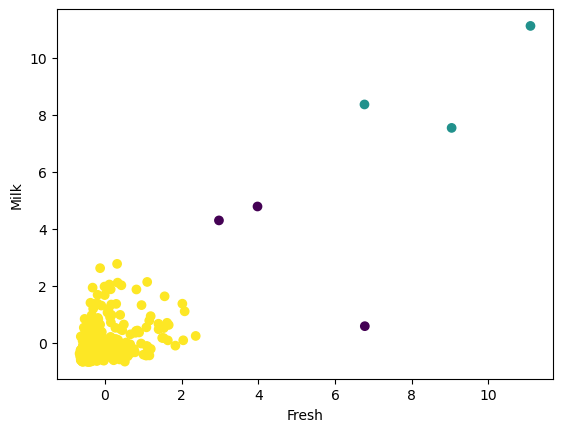

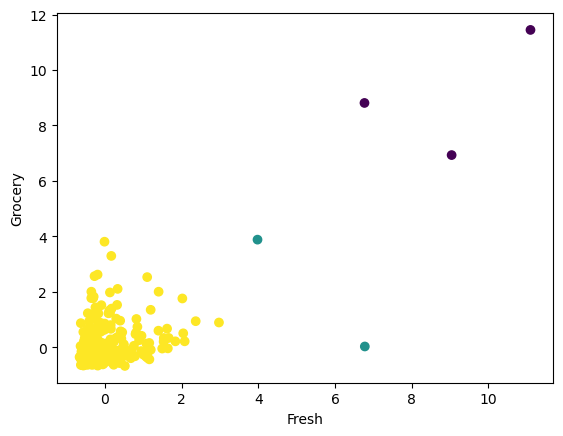

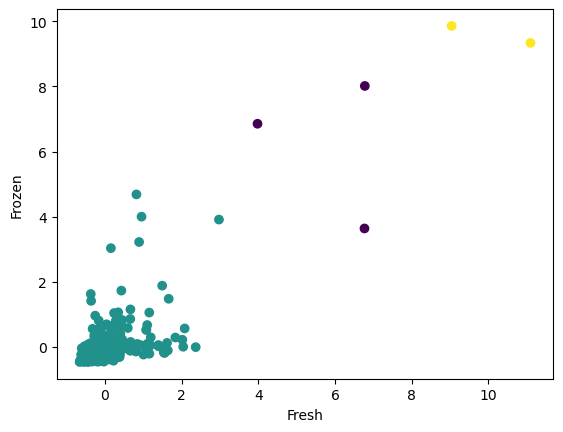

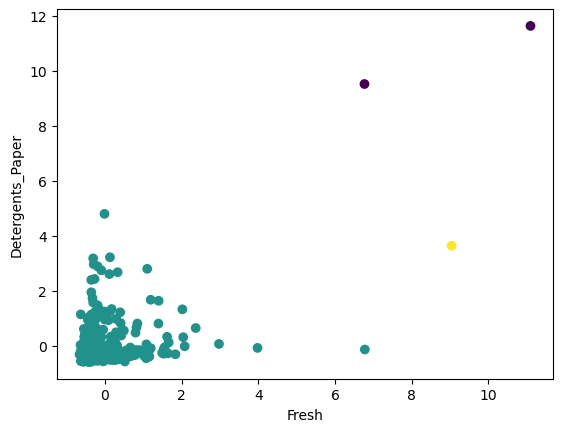

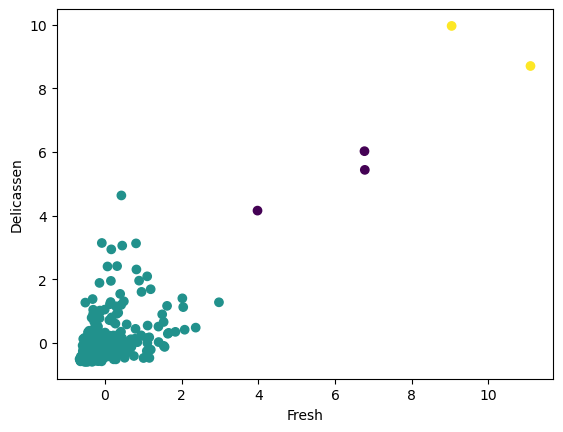

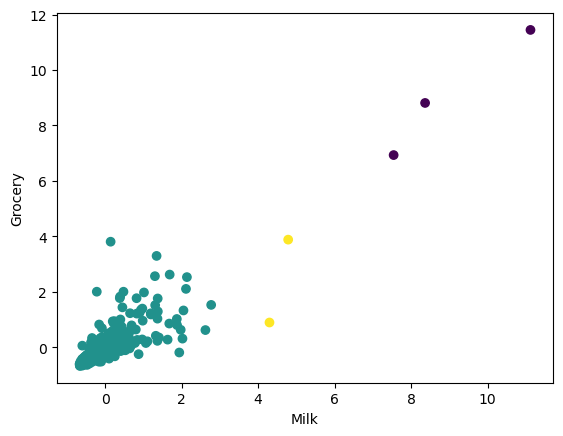

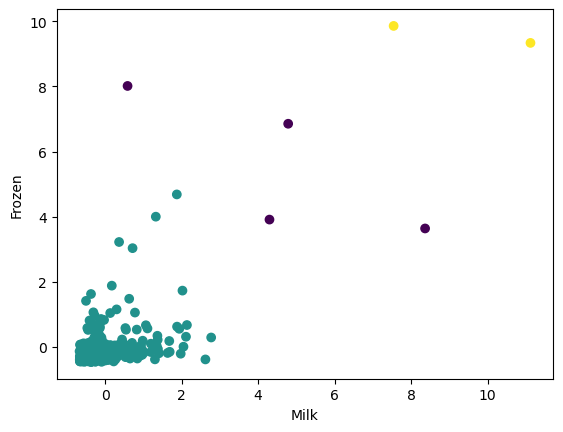

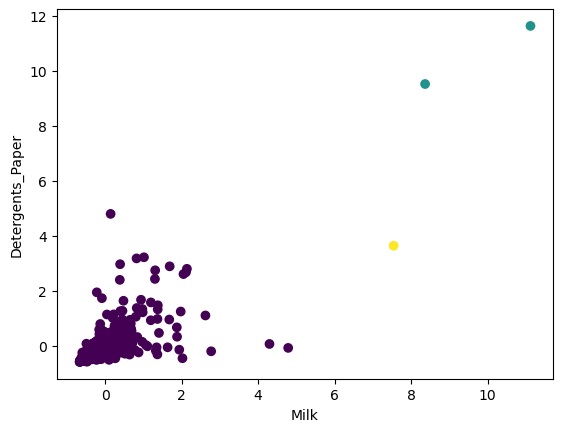

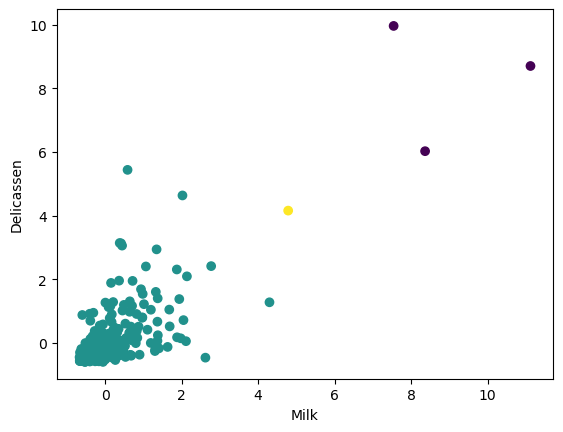

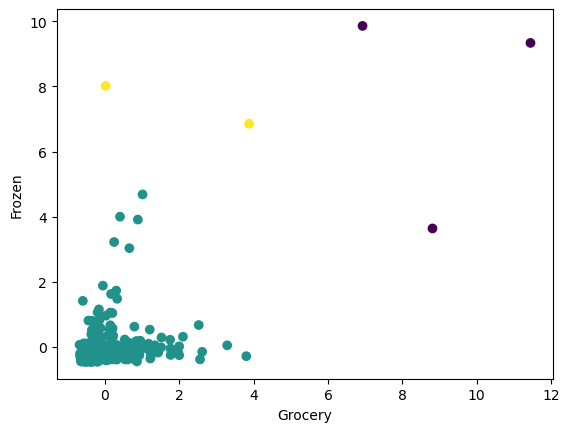

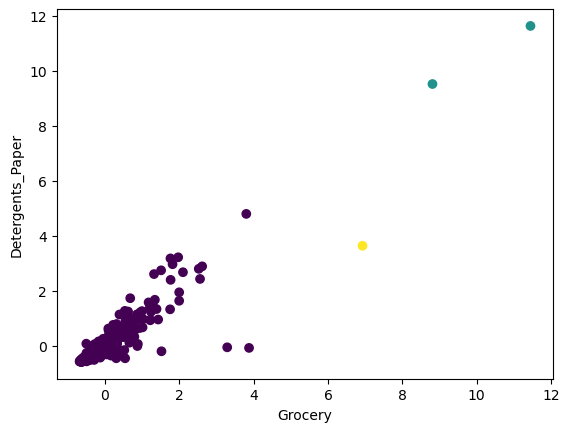

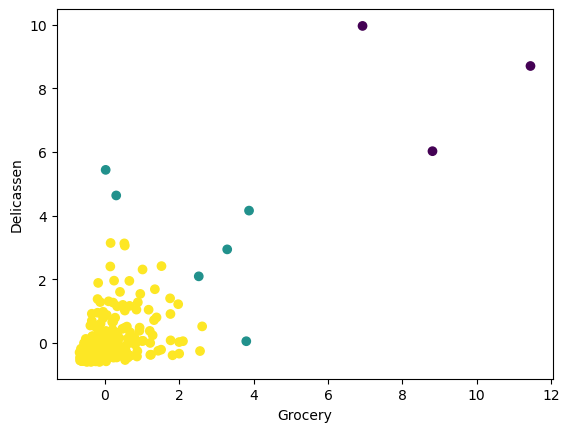

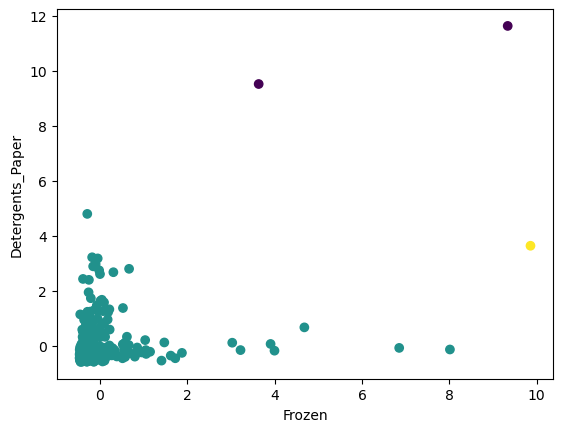

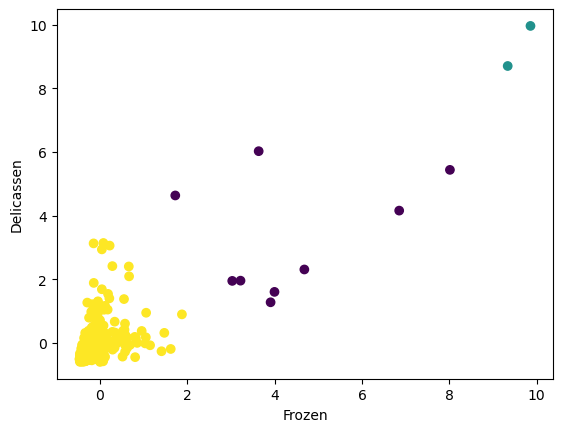

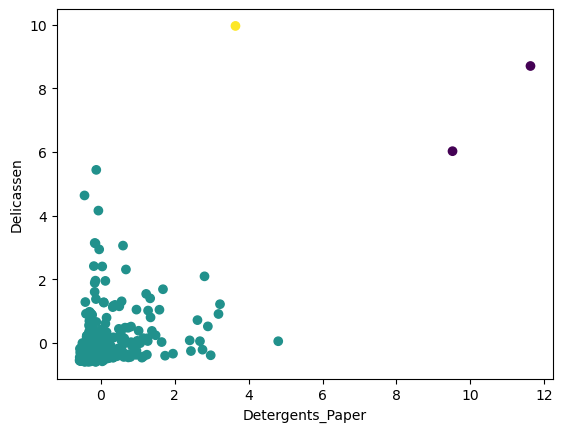

scatter_plots: None


In [2]:
# Running all functions
# feel free to comment out lines you don't want to run

df = read_csv_2('data/wholesale_customers.csv')
# print(df)
print("summary_statistics:", summary_statistics(df))
print("standardize:", standardize(df))
print("kmeans:", kmeans(df, 3))
print("kmeans_plus:", kmeans_plus(df, 3))
print("agglomerative:", agglomerative(df, 3))
rdf = cluster_evaluation(df)
print("rdf:", rdf)
print("best_clustering_score:", best_clustering_score(rdf))
print("scatter_plots:", scatter_plots(df))